In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pwd

'/Users/praneethbandi'

In [4]:
df = pd.read_csv('/Users/praneethbandi/TF_2_Notebooks_and_Data/DATA/cancer_classification.csv')

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


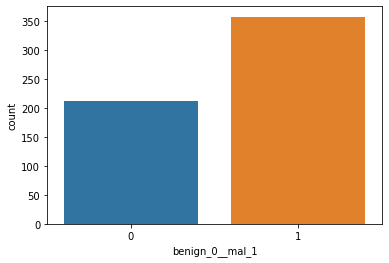

In [10]:
sns.countplot(x='benign_0__mal_1',data=df);

<AxesSubplot:>

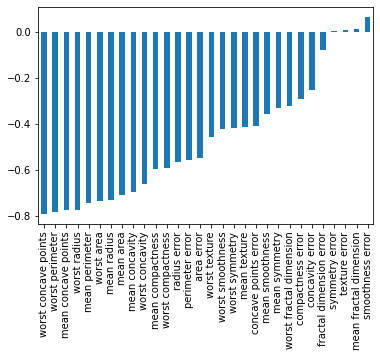

In [15]:
#Look for correlation. Drop the last one its the same
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

In [16]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
X_train = scaler.fit_transform(X_train)

In [22]:
X_test = scaler.transform(X_test)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [24]:
X_train.shape

(426, 30)

In [29]:
model = Sequential()

model.add(Dense(30, activation='relu'))

model.add(Dense(15, activation='relu'))

#Binary classification - sigmoid
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [30]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 1s 18ms/step - loss: 0.6901 - val_loss: 0.6747
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6611 - val_loss: 0.6469
Epoch 3/600
14/14 [==============================] - 0s 16ms/step - loss: 0.6332 - val_loss: 0.6153
Epoch 4/600
14/14 [==============================] - 0s 14ms/step - loss: 0.5994 - val_loss: 0.5765
Epoch 5/600
14/14 [==============================] - 0s 16ms/step - loss: 0.5554 - val_loss: 0.5233
Epoch 6/600
14/14 [==============================] - 0s 9ms/step - loss: 0.4977 - val_loss: 0.4611
Epoch 7/600
14/14 [==============================] - 0s 8ms/step - loss: 0.4493 - val_loss: 0.4093
Epoch 8/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3975 - val_loss: 0.3661
Epoch 9/600
14/14 [==============================] - 0s 8ms/step - loss: 0.3539 - val_loss: 0.3226
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3213 - val_loss: 0.2914
Epoch

Epoch 83/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0512 - val_loss: 0.1093
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0519 - val_loss: 0.1204
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0522 - val_loss: 0.1100
Epoch 86/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0508 - val_loss: 0.1149
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0516 - val_loss: 0.1197
Epoch 88/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0508 - val_loss: 0.1120
Epoch 89/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0505 - val_loss: 0.1114
Epoch 90/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0505 - val_loss: 0.1265
Epoch 91/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0506 - val_loss: 0.1155
Epoch 92/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0505 - val_loss: 0.1116


14/14 [==============================] - 0s 4ms/step - loss: 0.0392 - val_loss: 0.1256
Epoch 165/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0397 - val_loss: 0.1235
Epoch 166/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0395 - val_loss: 0.1327
Epoch 167/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0403 - val_loss: 0.1295
Epoch 168/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0395 - val_loss: 0.1313
Epoch 169/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0391 - val_loss: 0.1233
Epoch 170/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0402 - val_loss: 0.1321
Epoch 171/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0399 - val_loss: 0.1326
Epoch 172/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0502 - val_loss: 0.1219
Epoch 173/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0414 - val_loss: 0.1367
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0317 - val_loss: 0.1397
Epoch 246/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0346 - val_loss: 0.1445
Epoch 247/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0373 - val_loss: 0.1233
Epoch 248/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0315 - val_loss: 0.1318
Epoch 249/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0307 - val_loss: 0.1355
Epoch 250/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0339 - val_loss: 0.1450
Epoch 251/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0402 - val_loss: 0.1239
Epoch 252/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0326 - val_loss: 0.1258
Epoch 253/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0315 - val_loss: 0.1335
Epoch 254/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0310 - val_loss: 0.1243
Epo

14/14 [==============================] - 0s 5ms/step - loss: 0.0229 - val_loss: 0.1469
Epoch 327/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0277 - val_loss: 0.1407
Epoch 328/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0276 - val_loss: 0.1320
Epoch 329/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0230 - val_loss: 0.1496
Epoch 330/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0218 - val_loss: 0.1314
Epoch 331/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0237 - val_loss: 0.1501
Epoch 332/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0235 - val_loss: 0.1520
Epoch 333/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0217 - val_loss: 0.1344
Epoch 334/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0224 - val_loss: 0.1571
Epoch 335/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0220 - val_loss: 0.1352
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0167 - val_loss: 0.1558
Epoch 408/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0162 - val_loss: 0.1449
Epoch 409/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0193 - val_loss: 0.1738
Epoch 410/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0227 - val_loss: 0.1473
Epoch 411/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0231 - val_loss: 0.1494
Epoch 412/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0295 - val_loss: 0.1522
Epoch 413/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0294 - val_loss: 0.1435
Epoch 414/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0425 - val_loss: 0.2286
Epoch 415/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0333 - val_loss: 0.1418
Epoch 416/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0222 - val_loss: 0.1512
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0278 - val_loss: 0.2005
Epoch 489/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0274 - val_loss: 0.2155
Epoch 490/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0216 - val_loss: 0.1581
Epoch 491/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0122 - val_loss: 0.1752
Epoch 492/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0145 - val_loss: 0.1772
Epoch 493/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0108 - val_loss: 0.1662
Epoch 494/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0126 - val_loss: 0.1773
Epoch 495/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0121 - val_loss: 0.1653
Epoch 496/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0116 - val_loss: 0.1640
Epoch 497/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0108 - val_loss: 0.1680
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0082 - val_loss: 0.1850
Epoch 570/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0100 - val_loss: 0.1810
Epoch 571/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0089 - val_loss: 0.1975
Epoch 572/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0077 - val_loss: 0.1880
Epoch 573/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0074 - val_loss: 0.1863
Epoch 574/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0075 - val_loss: 0.1911
Epoch 575/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0076 - val_loss: 0.1802
Epoch 576/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0078 - val_loss: 0.1933
Epoch 577/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0112 - val_loss: 0.2005
Epoch 578/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0134 - val_loss: 0.1918
Epoc

In [31]:
losses = pd.DataFrame(model.history.history)

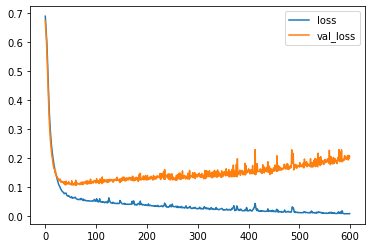

In [33]:
#Overfitting
losses.plot();

In [34]:
model = Sequential()

model.add(Dense(30, activation='relu'))

model.add(Dense(15, activation='relu'))

#Binary classification - sigmoid
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
#Stopping it from overfitting
early_stop = EarlyStopping(monitor='val_loss', mode='min',verbose=1,patience=25)

In [37]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 18ms/step - loss: 0.6847 - val_loss: 0.6684
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6488 - val_loss: 0.6381
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6197 - val_loss: 0.6070
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5865 - val_loss: 0.5715
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5492 - val_loss: 0.5304
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5064 - val_loss: 0.4824
Epoch 7/600
14/14 [==============================] - 0s 9ms/step - loss: 0.4581 - val_loss: 0.4312
Epoch 8/600
14/14 [==============================] - 0s 16ms/step - loss: 0.4094 - val_loss: 0.3814
Epoch 9/600
14/14 [==============================] - 0s 13ms/step - loss: 0.3615 - val_loss: 0.3344
Epoch 10/600
14/14 [==============================] - 0s 8ms/step - loss: 0.3221 - val_loss: 0.2984
Epoch 

In [38]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

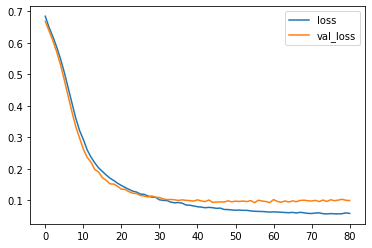

In [39]:
model_loss.plot()

In [40]:
from tensorflow.keras.layers import Dropout
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

#Binary classification - sigmoid
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [41]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 19ms/step - loss: 0.6913 - val_loss: 0.6559
Epoch 2/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6734 - val_loss: 0.6260
Epoch 3/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6375 - val_loss: 0.6041
Epoch 4/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6128 - val_loss: 0.5813
Epoch 5/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5955 - val_loss: 0.5579
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5823 - val_loss: 0.5385
Epoch 7/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5700 - val_loss: 0.5069
Epoch 8/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5313 - val_loss: 0.4732
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5345 - val_loss: 0.4436
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4863 - val_loss: 0.4117
Epoch 11

Epoch 83/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0990 - val_loss: 0.0859
Epoch 84/600
14/14 [==============================] - 0s 8ms/step - loss: 0.1284 - val_loss: 0.0793
Epoch 85/600
14/14 [==============================] - 0s 12ms/step - loss: 0.1169 - val_loss: 0.0781
Epoch 86/600
14/14 [==============================] - 0s 8ms/step - loss: 0.1191 - val_loss: 0.0890
Epoch 87/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1306 - val_loss: 0.0925
Epoch 88/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1286 - val_loss: 0.0779
Epoch 89/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1224 - val_loss: 0.0781
Epoch 90/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1008 - val_loss: 0.0868
Epoch 91/600
14/14 [==============================] - 0s 9ms/step - loss: 0.1120 - val_loss: 0.0909
Epoch 92/600
14/14 [==============================] - 0s 8ms/step - loss: 0.1197 - val_loss: 0.0937

In [42]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

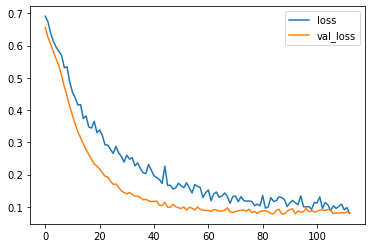

In [43]:
model_loss.plot()

In [55]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

5/5 [==============================] - 0s 4ms/step


In [56]:
from sklearn.metrics import classification_report, confusion_matrix

In [57]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [58]:
#misclassified 3 classifications
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 2 86]]
